# Loading packages

In [150]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [151]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [152]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2021
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2021
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,557
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,165
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,164


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [153]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,158.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,158.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,158.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,158.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,158.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,158.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,158.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,158.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,155.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,151.00


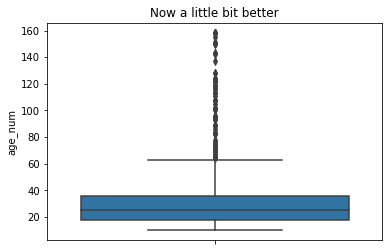

In [154]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

AttributeError: module 'seaborn' has no attribute 'displot'

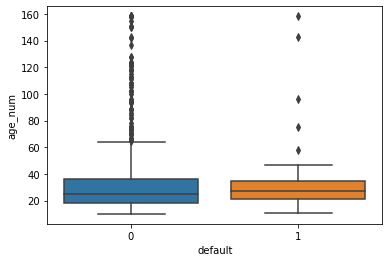

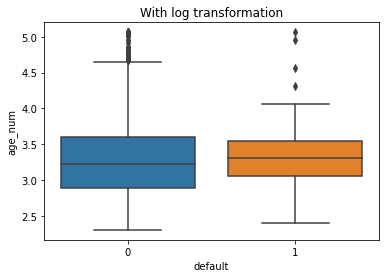

<Figure size 432x288 with 0 Axes>

In [155]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [ ]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

In [156]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2021-01-05 16:53 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8782    0.2572  -11.1898  0.0000  -3.3823  -2.3740
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [157]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    [1,2,3,4])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,3,4
default,,
0,386,245
1,19,19


In [158]:
# Mando
# df_train["age_cat"] = np.select([
#      df_train['age_num'].between(0, 19, inclusive=True),
#      df_train['age_num'].between(20, 29, inclusive=True),
#      df_train['age_num'].between(30, 39, inclusive=True),
#      df_train['age_num'].between(40, 49, inclusive=True),
#      df_train['age_num'].between(50, 59, inclusive=True),
#      df_train['age_num'].between(60, np.inf, inclusive=True)], 
#     ['10-19','20-29','30-39','40-49','50-59','>59'],)

# pd.crosstab(df_train["default"],df_train["age_cat"])

In [159]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.006   
Dependent Variable: default          AIC:              293.9493
Date:               2021-01-05 16:53 BIC:              302.9609
No. Observations:   669              Log-Likelihood:   -144.97 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.17575 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -4.3751    1.1807  -3.7056  0.0002  -6.6892  -2.0611
age_cat      0.4546    0.3346   1.3587  0.1742  -0.2012   1.1103



In [160]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [161]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [162]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [163]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
total_assets                 1
earn_from_op                 1
result_from_ord_bus          1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
sector                       0
year_inc                     0
zip_code                     0
legal_form                   0
default 

In [164]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [165]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: default          AIC:              294.4736
Date:               2021-01-05 16:53 BIC:              303.4851
No. Observations:   669              Log-Likelihood:   -145.24 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.25258 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -3.1658    0.3671  -8.6249  0.0000  -3.8852  -2.4464
zip_code     0.0000    0.0000   1.1393  0.2546  -0.0000   0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: 


                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: default          AIC:              295.3412
Date:               2021-01-05 16:53 BIC:              304.3498
No. Observations:   668              Log-Likelihood:   -145.67 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.56907 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.8026   0.1671 -16.7705 0.0000 -3.1301 -2.4750
annual_profit  -0.0000   0.0000  -0.5205 0.6027 -0.0000  0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: defa


                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: default          AIC:              295.2586
Date:               2021-01-05 16:53 BIC:              304.2672
No. Observations:   668              Log-Likelihood:   -145.63 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.52355 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.7837   0.1720 -16.1855 0.0000 -3.1208 -2.4466
current_assets -0.0000   0.0000  -0.4684 0.6395 -0.0000  0.0000

                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.002   
Dependent 

In [166]:
pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

,P-Value,NAs
cash,0.036941,32
year_inc,0.055606,0
total_equity,0.109640,21
gross_profit,0.153112,7
age_cat,0.174240,0
cf_operating,0.242710,1
bank_liabilities_lt,0.245019,545
zip_code,0.254582,0
total_liabilities_lt,0.259686,0
cf_investment,0.328421,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [167]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue

#sns.boxplot(x="default",y=np.log(df_train[col_list[6]]),data=df_train)

In [168]:
pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")

,Test statistic,P-Value,NAs
cash,7716.0,0.000111,32
trade_receivables_lt,8339.0,0.000805,645
trade_payables_lt,8430.0,0.001051,665
bonds_payables_st,8471.0,0.001183,669
bonds_payables_lt,8471.0,0.001183,669
monetary_current_assets,8712.0,0.002315,0
bonds_payables_mt,8855.0,0.003383,664
result_from_ord_bus,8910.0,0.003900,1
total_result,8993.0,0.004814,0
trade_payables_mt,9057.0,0.005645,648


# Variables
by Flave, kann zwecks Übersichtlichkeit evtl ganz oben dazu wo age bereits bearbeitet wird

In [169]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

#### Ebit Margin

In [170]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']

#### Profit Margin

In [171]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.02])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']

#### Cash

In [172]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.015])
#df_train['cash'] = np.log(df_train['cash'])
# print(df_train['cash'].isnull().sum())
# print(df_train['cash'].describe())
# print(df_train['cash'].value_counts())
# plt.boxplot(df_train['cash'])
# plt.show()
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))

#### Working Capital Ratio
= current assets/current liabilities (liquidity ratios measuring a companies ability to meet its short term dept obligations)

In [173]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
# print(df_train.wc_ratio)
# print(df_train.wc_ratio.describe())

#### Operating Profit Ratio 
= operating cf/sales

In [177]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])
# print(df_train.ocf_ratio)
# print(df_train.ocf_ratio.describe())
# print(df_train['ocf_ratio'].value_counts())
df_test['ocf_ratio'] = df_test['cf_operating']/df_test['sales']

#### Equity Ratio 
First predict NaN's for total equity

In [178]:
# Check for correlation to get relevant variables for regression
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))

cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

# Split training and prediction dataset
y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

#Train model to fit dataset and predict missing values from column total equity and replace them
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

# Replace the missing values with predicted values
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
# print(df_train['total_equity'].isnull().sum())
# print(df_train['total_equity'].describe())
# print(df_train['total_equity'].value_counts())

corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584
[ 804154.57039482  826770.3743369   750108.4400077  2034060.76386615
  906958.71620787  757800.9886018   694739.75133316  777633.44217636
 1031927.82907443  707250.9930617   798206.66922869  753555.95951814
  938481.58223854  838818.88678533  728338.08877873  658229.22939662
  757045.94589862 3707034.78681172  430054.79880166  809294.10299164]


Calculate ratio: total equity / total assets

In [179]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
# print(df_train.equity_ratio)
# print(df_train.equity_ratio.describe())
# print(df_train.equity_ratio.value_counts())
df_test['equity_ratio'] = np.where(df_test['total_equity'] > 1, df_test['total_equity']/df_test['total_assets'], 0)

#### Debt-to-Equity Ratio  
= total dept/total equity

In [180]:
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
# df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

# print(df_train.debt_to_equity.describe())
# print(df_train.debt_to_equity)
# print(df_train.debt_to_equity.value_counts())
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']
df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

#### Return on Assets

In [181]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
df_test['roa'] = df_test['annual_profit']/df_test['total_assets']

### Boxplots for Ratios

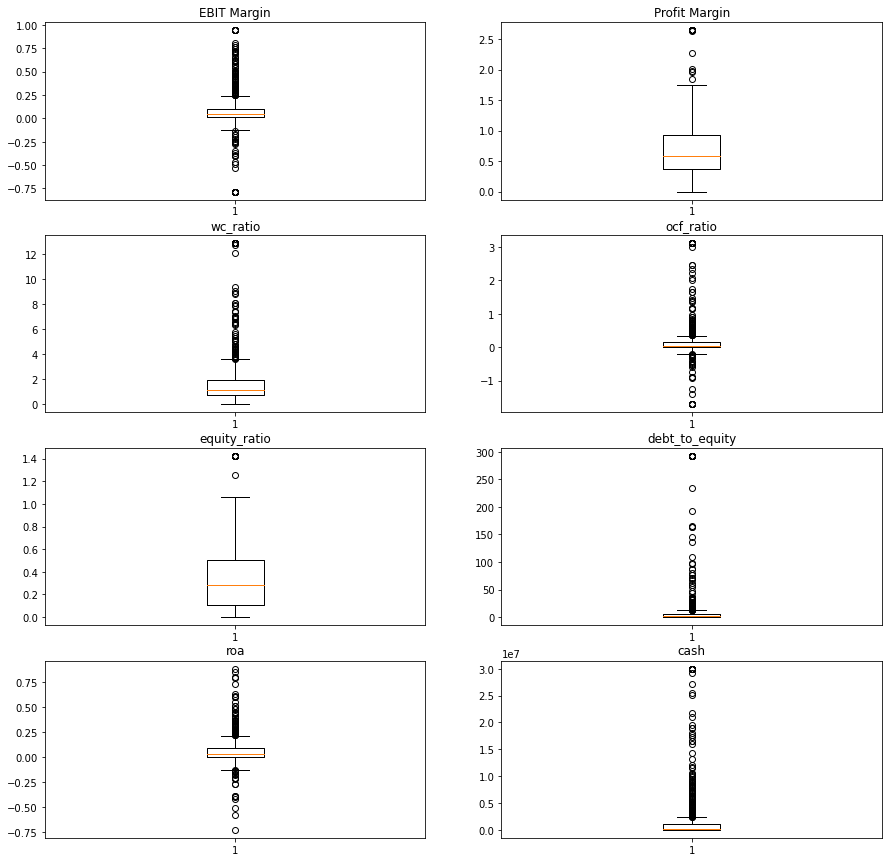

In [182]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['ebit_margin'])
ax[0,0].set_title('EBIT Margin')
ax[0,1].boxplot(df_train['profit_margin'])
ax[0,1].set_title('Profit Margin')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['ocf_ratio'])
ax[1,1].set_title('ocf_ratio')
ax[2,0].boxplot(df_train['equity_ratio'])
ax[2,0].set_title('equity_ratio')
ax[2,1].boxplot(df_train['debt_to_equity'])
ax[2,1].set_title('debt_to_equity')
ax[3,0].boxplot(df_train['roa'])
ax[3,0].set_title('roa')
ax[3,1].boxplot(df_train['cash'])
ax[3,1].set_title('cash')
plt.show()

### Summary Flaves Ratios and Variables

   ebit_margin  profit_margin         cash   wc_ratio  ocf_ratio  \
0     0.061157       0.361114  10297047.50   5.142587   0.065368   
1     0.027363       1.104725    926383.75   0.663710  -1.713468   
2     0.023240       2.640070   9146283.79   3.328108   2.471134   
3     0.133260       2.640070   6890565.23   3.193566   0.391307   
4     0.489225       1.135876   5036615.09   0.102055   1.178664   
5     0.495412       1.072966     75679.79  12.899702   0.398513   
6     0.313524       0.713560  11542490.91   0.834046   0.265676   
7    -0.471429       0.148888  21696000.00   1.483001   2.061521   
8     0.385857       0.622833    322573.88   0.394765   0.044533   
9     0.940537       2.272888     35726.57   0.711538   1.406577   

   equity_ratio  debt_to_equity           roa  
0      0.738567        0.352444  1.494000e-01  
1      0.389698        1.560542  9.655827e-02  
2      0.000937      163.778649 -2.540307e-17  
3      0.592532        0.236311  2.980723e-02  
4      0.41

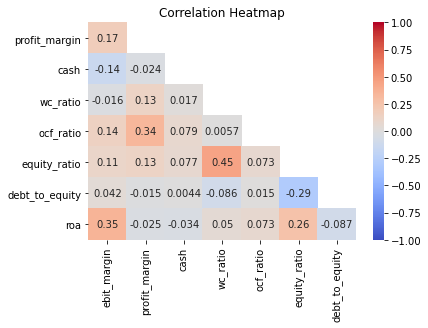

In [127]:
col = ['ebit_margin', 'profit_margin', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
print(data.head(10))
print(data.info())

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Ebit
- Profit
- Cash
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio


In [212]:
col_list = ["default","age_cat","ebit_margin","profit_margin","cash","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_cat,ebit_margin,profit_margin,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,4,0.061157,0.361114,10297047.50,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0,4,0.027363,1.104725,926383.75,0.663710,-1.713468,0.389698,1.560542,9.655827e-02
2,0,4,0.023240,2.640070,9146283.79,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0,4,0.133260,2.640070,6890565.23,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0,4,0.489225,1.135876,5036615.09,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,4,0.013336,0.506472,31000.00,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0,3,0.047281,0.446851,252537.31,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0,3,0.298976,1.000000,573037.66,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,3,0.053456,1.049012,5652.17,0.615002,0.137266,0.000000,0.000000,6.375280e-02


## EBIT

AttributeError: module 'seaborn' has no attribute 'displot'

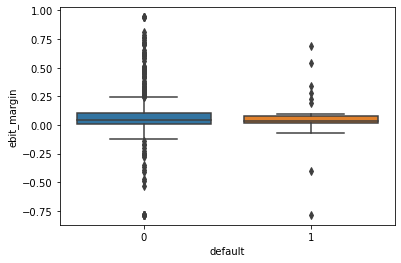

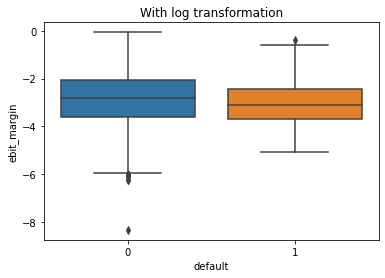

<Figure size 432x288 with 0 Axes>

In [216]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ebit_margin + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Profit

AttributeError: module 'seaborn' has no attribute 'displot'

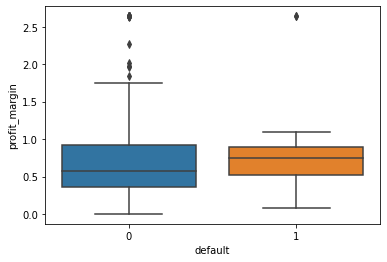

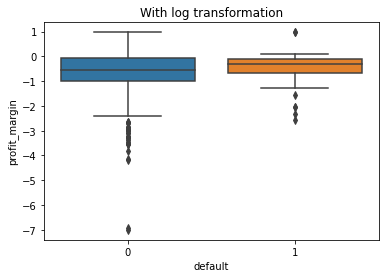

<Figure size 432x288 with 0 Axes>

In [217]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ profit_margin + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

AttributeError: module 'seaborn' has no attribute 'displot'

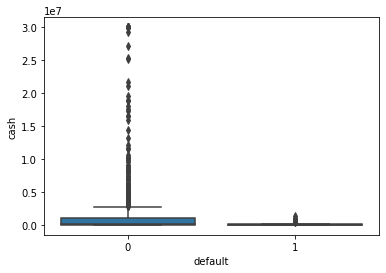

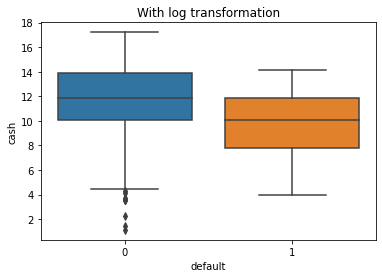

<Figure size 432x288 with 0 Axes>

In [186]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Working Capital Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

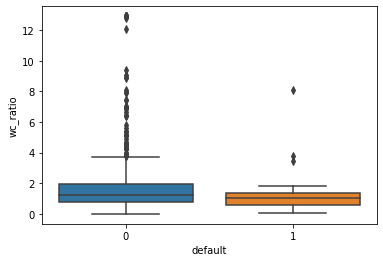

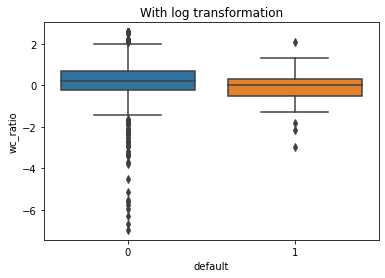

<Figure size 432x288 with 0 Axes>

In [187]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

In [ ]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
#plt.figure()
#sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

AttributeError: module 'seaborn' has no attribute 'displot'

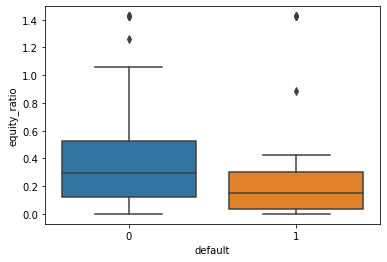

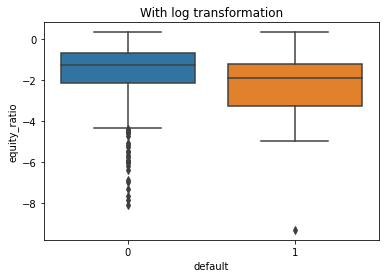

<Figure size 432x288 with 0 Axes>

In [188]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [ ]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

## Debt to Equity Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

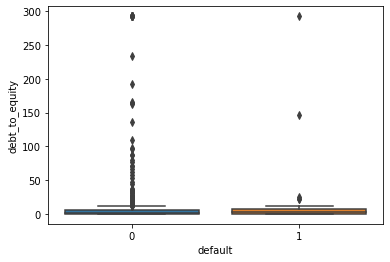

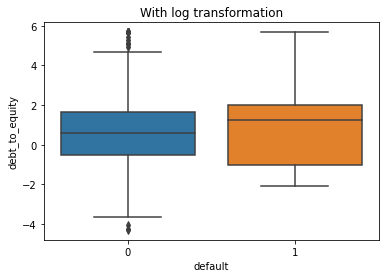

<Figure size 432x288 with 0 Axes>

In [189]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

# Our Logit Regression

In [201]:
mdl1 = sm.Logit.from_formula('default ~ age_cat + cash + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.095    
Dependent Variable: default          AIC:              284.0551 
Date:               2021-01-05 17:00 BIC:              329.0980 
No. Observations:   668              Log-Likelihood:   -132.03  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0011078
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -4.4926   1.2885 -3.4867 0.0005 -7.0180 -1.9672
age_cat           0.6059   0.3487  1.7378 0.0823 -0.0775  1.2894
cash             -0.0000   0.0000 -1.9903 0.0466 -0.0000 -0.0000
profit_margin     0.4551   0.4142  1.0986 0.2719 -

In [202]:
y = df_train["default"]
X = df_train[['age_cat', 'cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.197646
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.095    
Dependent Variable: default          AIC:              284.0551 
Date:               2021-01-05 17:00 BIC:              329.0980 
No. Observations:   668              Log-Likelihood:   -132.03  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0011078
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -4.4926   1.2885 -3.4867 0.0005 -7.0180 -1.9672
age_cat           0.6059   0.3487  1.7378 0.0823 -0.0775  1.2894
cash             -0.0000   0.0000 -1.9903 0.0466 -0.0000 -0.0000
profit_margin     0.4551   0.4142  1.0986 0.2719 -0.3568  1.2670
ebit_margin      -1.0134   0.7673 -1.3208 0.1866 -2.5173  0.4905
wc_ratio         -0.2369   0.1393 -1.7009 0.0890 -0.5098  0.0361
ocf_ratio         0.1218   0.2857  0.4262 0.6700 -0.4382  0.6818
equity_ratio      0.3687   0.5798  0.6360 0.5248 -0.7676  1.5051
debt_to_equity    0.0006   0.0035  0.1587 0.8739 -0.0064  0.0075
roa              -1.3379   1.3766 -0.9719 0.3311 -4.0361  1.3602
================================================================

"""

In [203]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
419,1,39.40
358,0,34.75
212,1,29.74
15,0,24.08
409,0,22.52
...,...,...
476,0,0.00
440,0,0.00
432,0,0.00
410,0,0.00


In [204]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,2.97
43,1,11.42
69,1,8.91
104,1,10.17
114,1,4.36
120,1,8.98
128,1,12.59
139,1,6.93
150,1,8.43
198,1,6.38


In [205]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.197806
         Iterations 11
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.7192460317460317
GINI (LY):  0.4384920634920635


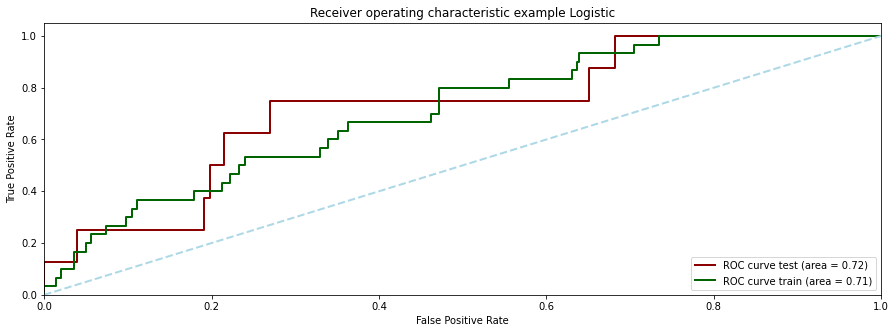

In [206]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.7208855472013367
GINI L1:  0.44177109440267337
AUC L2:   0.7208855472013367
GINI L2:  0.44177109440267337
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.7192460317460317
GINI Test Sample:  0.4384920634920635


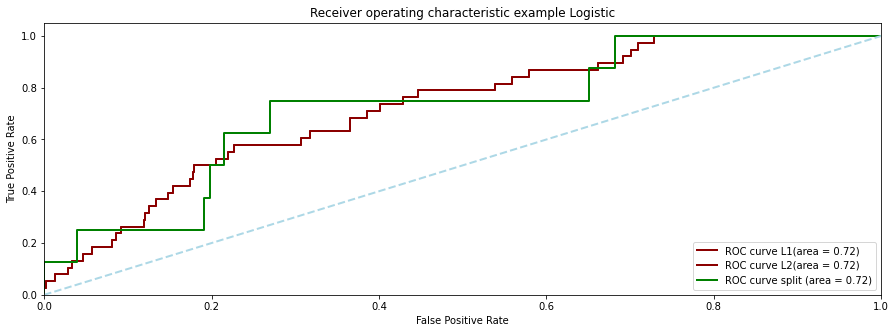

In [207]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

# Random Forest Approach

In [208]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

1.0

In [209]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.06 .


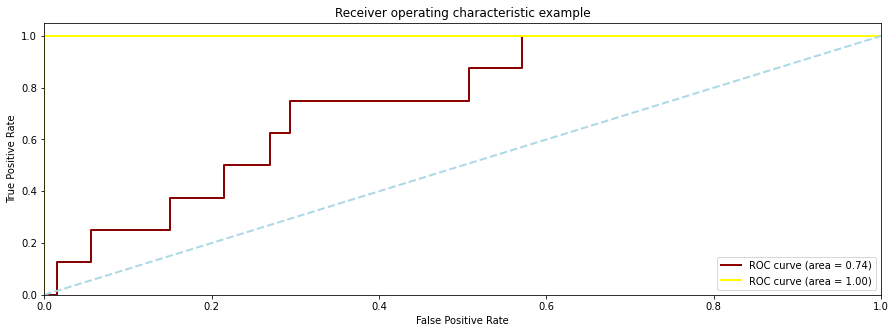

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.7400793650793651
GINI:  0.48015873015873023


In [210]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [211]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=2000, n_jobs=2,
                       oob_score=True, random_state=0)